#### PROBLEM STATEMENT:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:

| Which variables are significant in predicting the demand for shared bikes.

 | How well those variables describe the bike demands

### BUSINESS GOAL:
    
    

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

#### IMPORTING LIBRARIES::

In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


%matplotlib inline 

##### Importing dataset

In [339]:
dataset= pd.read_csv(r"C:\Users\lenovo pc\Downloads\day.csv")
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### UNDERSTANDING DATA 

In [340]:
dataset.shape

(730, 16)

In [341]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [342]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [343]:
dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### As we can see there no nulls in the dataset

### Checking Duplicates

In [344]:
df= dataset.copy()
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Dropping the duplicates

In [345]:
df.drop_duplicates(inplace=True)

In [346]:
## lets check the shape now
df.shape

(730, 16)

we can say there are no duplicates in our dataset

In [347]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [348]:
## Lets drop some unwanted columns
df.drop(['dteday','instant','casual','registered'],axis=1, inplace =True)

## we can see the cnt contains both casual & registered customers & also seperately mentiones hence we can drop these columns  

In [349]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [350]:
## lets find the categorical variable in other dtype form & convert back into categorical variables
df["mnth"]=df.mnth.astype("category")
df["weekday"]=df.weekday.astype("category")
df["season"]=df.season.astype("category")
df["weathersit"]=df.weathersit.astype("category")

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 55.2 KB


In [352]:
## from the data dictionary we can map what the categorical variables were defines as
df.season=df.season.map({1:"Spring",2:"Summer",3:"Fall",4:"Winter"})
df.mnth=df.mnth.map({1:"Jan",2:"Feb",3:"Mar",4:"April",5:"May",6:"June",7:"July",8:"Aug",
                         9:"Sep",10:"Oct",11:"Nov",12:"Dec"})
df.weekday=df.weekday.map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thurs",5:"Fri",6:"Sat"})
df.weathersit=df.weathersit.map({1:"Clear",2:"Mist",3:"Light Snow",4:"Rainfall"})

In [353]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### DATA VISUALIZATION

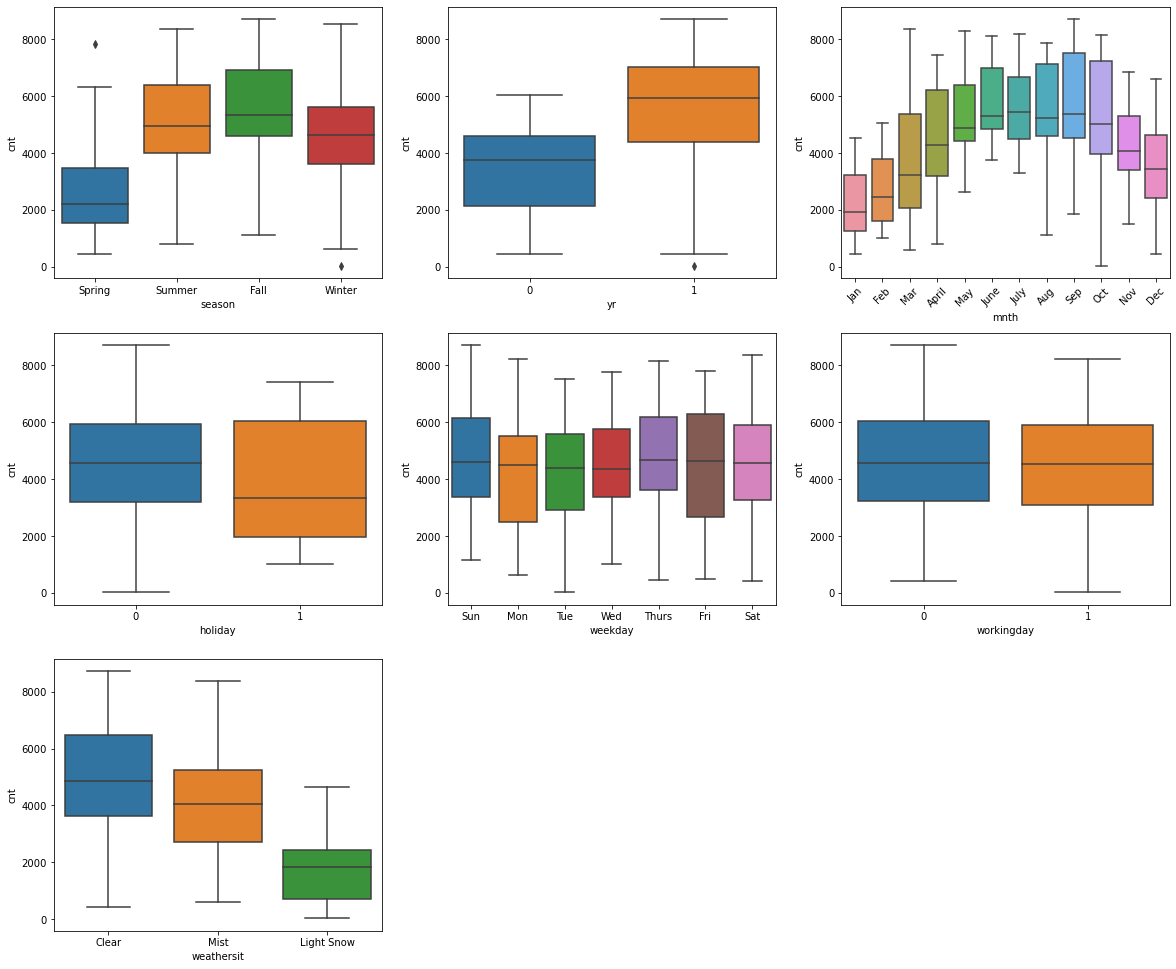

In [354]:
### Lets visualize the data to understand from insights
## lets see some boxplots for different categorical variables 
plt.figure(figsize=(20,17))
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=df)   
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.xticks(rotation=45)
plt.show()

#### OBSERVATIONS:
#####  1. FALL, SUMMER , WINTER have more cnt values shows bike pool is used in these seasons more as compared with spring 
#####  2. In non holiday days the bike pools shows more count but the demand is more in holidays as median 
#####       is lying a bit below the working days.
#####  3. clear weather shows more counts & very low for light snow days.

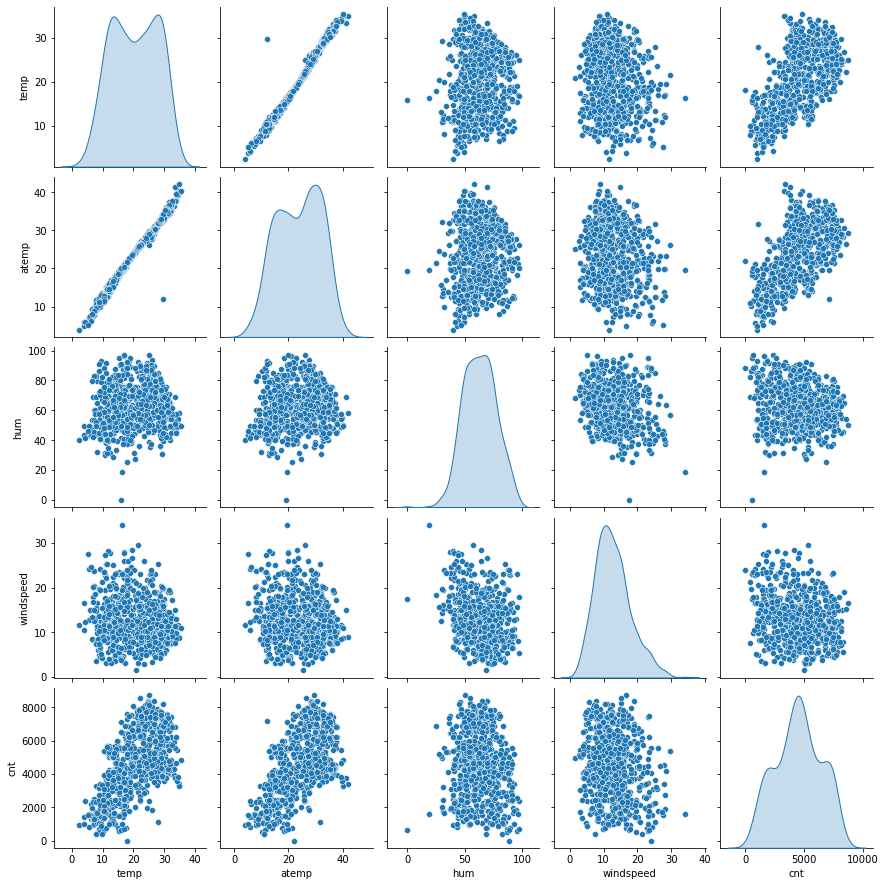

In [355]:
###  lets plot some pairplots for numerical variables 
sns.pairplot(data=df,vars=['temp','atemp','hum','windspeed','cnt'],diag_kind='kde')
plt.show()

### we can see there is a strong linear relationship between temp, atemp & cnt variables 

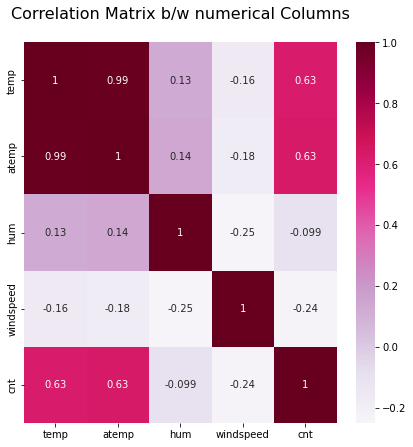

In [356]:
# Finding the Corelation matrix for numerical columns
plt.figure(figsize=(7,7))
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(),cmap='PuRd',annot=True)
plt.title("Correlation Matrix b/w numerical Columns\n", fontsize=16)
plt.show()

#### We can see the coeff between temp & atemp variable is 0.99 which means they have strong linear relationship, 
#### which signifies multi linearity that affects the models, this should be check when we find the VIF.

In [357]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### CREATING DUMMY VARIABLES

In [358]:
season_df=pd.get_dummies(df.season,drop_first=True)
month_df=pd.get_dummies(df.mnth,drop_first=True)
weekday_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)

In [359]:
season_df
month_df
weekday_df


,Mon,Tue,Wed,Thurs,Fri,Sat
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
725,0,0,0,0,1,0
726,0,0,0,0,0,1
727,0,0,0,0,0,0
728,1,0,0,0,0,0


In [360]:
## lets Concating the dummy variables to original dataset
df1=pd.concat([df,season_df,month_df,weekday_df,weathersit_df],axis=1)

In [361]:
pd.set_option('display.max_columns',None)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter,Feb,Mar,April,May,June,July,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thurs,Fri,Sat,Mist,Light Snow
0,Spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,Spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [362]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
 12  Summer      730 non-null    uint8   
 13  Fall        730 non-null    uint8   
 14  Winter      730 non-null    uint8   
 15  Feb         730 non-null    uint8   
 16  Mar         730 non-null    uint8   
 17  April       730 non-null    uint8   
 18  May         730 non-null    uint8   
 19  June    

In [363]:
## lets drop the catergorical columns which are repeated

df1.drop(["weekday",'season','mnth','weathersit'],axis=1,inplace=True)

In [364]:
df1.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Summer', 'Fall', 'Winter', 'Feb', 'Mar', 'April', 'May', 'June',
       'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Mon', 'Tue', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Mist', 'Light Snow'],
      dtype='object')

We can see the columns are dropped now the date is more efficient


### Splitting the data into Train & Test datasets 

In [365]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [366]:
## Lets split the dataset into Train & Test data in the ratio of 70:30
data_train,data_test=train_test_split(df1,train_size=0.7,random_state=50)


In [367]:
#Checking the shape of train data

data_train.shape

(510, 30)

In [368]:
#Checking the shape of test data
data_test.shape

(220, 30)

In [369]:
data_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter,Feb,Mar,April,May,June,July,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thurs,Fri,Sat,Mist,Light Snow
172,0,0,1,30.066653,34.69145,70.7500,11.541554,4507,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
14,0,0,1,9.566653,12.40560,49.8750,10.583521,1248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
204,0,0,1,34.030000,39.74145,55.0833,11.334457,3606,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
182,0,0,1,30.271653,33.36540,44.4583,7.709154,5119,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
708,1,0,1,17.869153,21.77875,92.5000,12.750636,5170,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [370]:
## Lets apply MINMAX scalar
scaler=MinMaxScaler()

#Applying Scaler function to continuous variables
cont=['temp','atemp','hum','windspeed','cnt']
data_train[cont]=scaler.fit_transform(data_train[cont])

In [371]:
data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter,Feb,Mar,April,May,June,July,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thurs,Fri,Sat,Mist,Light Snow
172,0,0,1,0.865247,0.858891,0.729068,0.274549,0.515992,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
14,0,0,1,0.223565,0.236172,0.513954,0.243603,0.141049,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
204,0,0,1,0.989306,1.000000,0.567625,0.267859,0.412333,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
182,0,0,1,0.871664,0.821838,0.458136,0.150755,0.586401,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
708,1,0,1,0.483446,0.498080,0.953198,0.313605,0.592269,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [372]:

data_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter,Feb,Mar,April,May,June,July,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thurs,Fri,Sat,Mist,Light Snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.482353,0.023529,0.698039,0.552655,0.545216,0.644402,0.317884,0.510488,0.254902,0.24902,0.250980,0.076471,0.094118,0.074510,0.100000,0.082353,0.078431,0.088235,0.064706,0.086275,0.088235,0.092157,0.135294,0.149020,0.150980,0.145098,0.137255,0.149020,0.341176,0.031373
std,0.500179,0.151726,0.459559,0.230616,0.223335,0.149118,0.167384,0.223400,0.436234,0.43287,0.434003,0.266010,0.292279,0.262857,0.300295,0.275172,0.269113,0.283915,0.246248,0.281045,0.283915,0.289531,0.342373,0.356457,0.358381,0.352545,0.344454,0.356457,0.474570,0.174494
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343347,0.345522,0.524581,0.197845,0.350523,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.553497,0.556759,0.648347,0.295422,0.517027,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757231,0.732269,0.752146,0.406471,0.672141,1.000000,0.00000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Hence the data is prepare & ready to fit into a linear model 


### Linear Modelling 

In [373]:
## Lets build a linear model with x & y variables
y_train=data_train.pop('cnt')
X_train=data_train

In [374]:
lm=LinearRegression()
lm.fit(X_train,y_train)

#Using Recursive Feature Elimination(RFE) for picking top 15 variables

rfe=RFE(estimator=lm,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [375]:
#lets Display the variables ranking using Rfe

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Summer', True, 1),
 ('Fall', False, 3),
 ('Winter', True, 1),
 ('Feb', False, 12),
 ('Mar', False, 6),
 ('April', False, 9),
 ('May', False, 7),
 ('June', False, 8),
 ('July', False, 11),
 ('Aug', False, 10),
 ('Sep', True, 1),
 ('Oct', False, 5),
 ('Nov', False, 14),
 ('Dec', False, 15),
 ('Mon', True, 1),
 ('Tue', False, 2),
 ('Wed', True, 1),
 ('Thurs', True, 1),
 ('Fri', True, 1),
 ('Sat', False, 13),
 ('Mist', False, 4),
 ('Light Snow', True, 1)]

In [376]:
#lets Displaying the variables selected using RFE

cols=X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Summer', 'Winter', 'Sep', 'Mon', 'Wed', 'Thurs', 'Fri', 'Light Snow'],
      dtype='object')

In [377]:
# Columns which have been rejected
X_train.columns[~rfe.support_]

Index(['Fall', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Oct',
       'Nov', 'Dec', 'Tue', 'Sat', 'Mist'],
      dtype='object')

In [378]:
# Calculating VIF
def calcVIF(val):
    vif=pd.DataFrame()
    vif['Features']=val.columns
    vif['VIF']=[variance_inflation_factor(val.values,i) for i in range(val.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif


In [379]:
X_train_rfe=X_train[cols]

In [380]:
X_train_rfe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Summer,Winter,Sep,Mon,Wed,Thurs,Fri,Light Snow
172,0,0,1,0.865247,0.858891,0.729068,0.274549,0,0,0,0,0,0,1,0
14,0,0,1,0.223565,0.236172,0.513954,0.243603,0,0,0,1,0,0,0,0
204,0,0,1,0.989306,1.000000,0.567625,0.267859,0,0,0,0,0,0,0,0
182,0,0,1,0.871664,0.821838,0.458136,0.150755,0,0,0,1,0,0,0,0
708,1,0,1,0.483446,0.498080,0.953198,0.313605,0,1,0,0,0,0,0,0


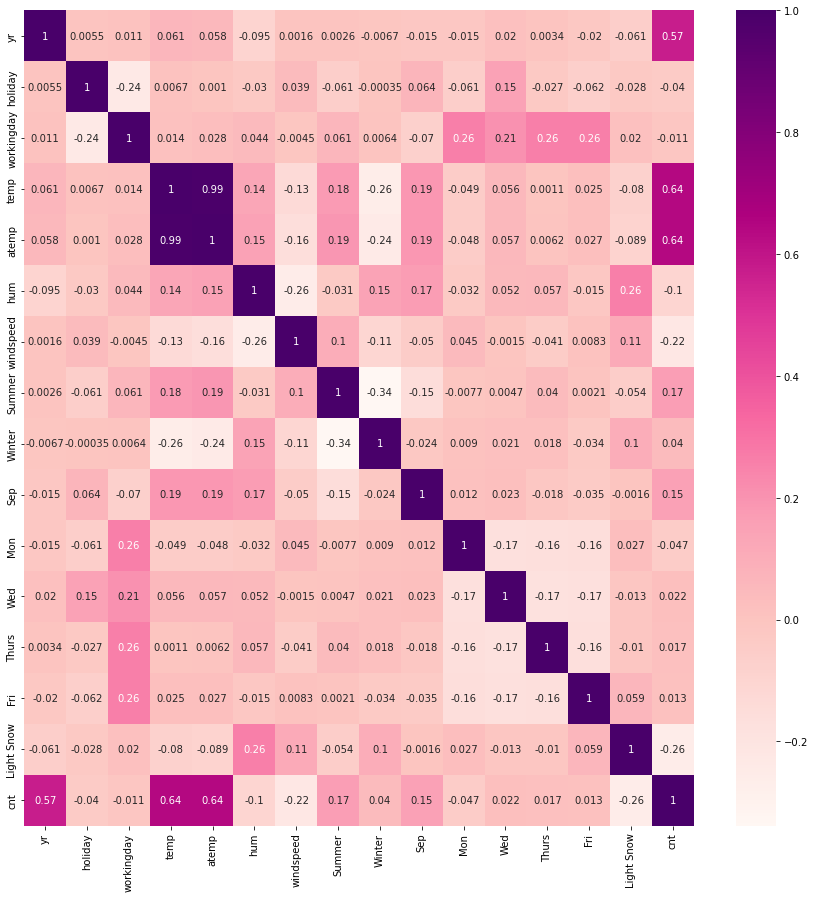

In [381]:
#Lets find the correlation between RFE selected columns and the target variable
corr_matrix=pd.concat([X_train_rfe,df['cnt']],axis=1)
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix.corr(),annot=True,cmap='RdPu')
plt.show()

In [382]:
# lets Calculate vif for the rfe selected columns
calcVIF(X_train_rfe)

,Features,VIF
4,atemp,370.57
3,temp,356.74
5,hum,10.88
2,workingday,7.16
6,windspeed,3.77
11,Wed,2.00
12,Thurs,1.97
13,Fri,1.94
10,Mon,1.92
0,yr,1.90


If we call back we found multilinearity between temp & atemp , now here 
we can see fro VIF values shows the same relationn between them

In [383]:
#LINEAR MODEL 01
X_train_lm_1=sm.add_constant(X_train_rfe)
lm_1=sm.OLS(y_train,X_train_lm_1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     178.0
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          4.38e-188
Time:                        23:41:28   Log-Likelihood:                 514.77
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     494   BIC:                            -929.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2745      0.025     10.780      0.0

We can see atemp variable has high p value & high VIF value so lets drop this variable

In [384]:
#lets drop atemp variable
X_train_new=X_train_rfe.drop(['atemp'],axis=1)

#Checking VIF
calcVIF(X_train_new)

,Features,VIF
4,hum,10.59
3,temp,7.19
2,workingday,7.10
5,windspeed,3.66
10,Wed,2.00
11,Thurs,1.97
12,Fri,1.94
9,Mon,1.92
0,yr,1.90
7,Winter,1.63


In [385]:
## if we see from the vif table next highest values is for hum so lets check that
## LINEAR MODEL 02
X_train_lm_2=sm.add_constant(X_train_new)
lm_2=sm.OLS(y_train,X_train_lm_2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.0
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          3.56e-189
Time:                        23:41:28   Log-Likelihood:                 514.62
No. Observations:                 510   AIC:                            -999.2
Df Residuals:                     495   BIC:                            -935.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2751      0.025     10.820      0.0

As we can see the VIF value for hum variable is >5 so lets drop this

In [386]:
# Lets Drop humidity variable
X_train_new=X_train_new.drop(['hum'],axis=1)

#Calculating VIF
calcVIF(X_train_new)

,Features,VIF
2,workingday,6.75
3,temp,4.32
4,windspeed,3.35
9,Wed,2.00
10,Thurs,1.97
11,Fri,1.94
8,Mon,1.92
0,yr,1.88
5,Summer,1.61
6,Winter,1.39


In [387]:
### LINEAR MODEL 03 
X_train_lm_3=sm.add_constant(X_train_new)
lm_3=sm.OLS(y_train,X_train_lm_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     164.2
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          3.44e-170
Time:                        23:41:28   Log-Likelihood:                 466.70
No. Observations:                 510   AIC:                            -905.4
Df Residuals:                     496   BIC:                            -846.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0794      0.018      4.386      0.0

So, here working day variable is showing VIF value >5 so lets drop this


In [388]:
#Lets Drop workingday
X_train_new=X_train_new.drop(['workingday'],axis=1)

#Calculate VIF
calcVIF(X_train_new)

,Features,VIF
2,temp,4.05
3,windspeed,3.23
0,yr,1.87
4,Summer,1.61
5,Winter,1.37
8,Wed,1.35
9,Thurs,1.29
10,Fri,1.29
7,Mon,1.28
6,Sep,1.16


In [389]:
## LINEAR MODEL 04
X_train_lm_4=sm.add_constant(X_train_new)
lm_4=sm.OLS(y_train,X_train_lm_4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          9.38e-170
Time:                        23:41:29   Log-Likelihood:                 462.97
No. Observations:                 510   AIC:                            -899.9
Df Residuals:                     497   BIC:                            -844.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0666      0.018      3.786      0.0

From the table we can see P value for Thurs is more so, its better drop this.

In [390]:
#Lets Drop 'Thurs' variable
X_train_new=X_train_new.drop(['Thurs'],axis=1)

#Calc VIF
calcVIF(X_train_new)

,Features,VIF
2,temp,3.88
3,windspeed,3.20
0,yr,1.87
4,Summer,1.60
5,Winter,1.35
8,Wed,1.28
9,Fri,1.23
7,Mon,1.22
6,Sep,1.16
10,Light Snow,1.07


In [391]:
## LINEAR MODEL 05

X_train_lm_5=sm.add_constant(X_train_new)
lm_5=sm.OLS(y_train,X_train_lm_5).fit()
print(lm_5.summary())



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     191.4
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          6.72e-171
Time:                        23:41:29   Log-Likelihood:                 462.95
No. Observations:                 510   AIC:                            -901.9
Df Residuals:                     498   BIC:                            -851.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0660      0.017      3.827      0.0

Now, we can see Mon variable showing high p value it is good to drop this.

In [392]:
# Lets Drop 'Mon' as it is having high p-value
X_train_new=X_train_new.drop(['Mon'],axis=1)

#Calculate VIF
calcVIF(X_train_new)


,Features,VIF
2,temp,3.83
3,windspeed,3.12
0,yr,1.87
4,Summer,1.60
5,Winter,1.35
7,Wed,1.24
8,Fri,1.19
6,Sep,1.16
9,Light Snow,1.07
1,holiday,1.06


In [393]:
### LINEAR REGRESSION MODEL 06

X_train_lm_6=sm.add_constant(X_train_new)
lm_6=sm.OLS(y_train,X_train_lm_6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     210.9
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          4.65e-172
Time:                        23:41:29   Log-Likelihood:                 462.92
No. Observations:                 510   AIC:                            -903.8
Df Residuals:                     499   BIC:                            -857.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0654      0.017      3.834      0.0

In [394]:
#Lets Drop 'wed'
X_train_new=X_train_new.drop(['Wed'],axis=1)

#Calculate VIF
calcVIF(X_train_new)

,Features,VIF
2,temp,3.74
3,windspeed,3.11
0,yr,1.87
4,Summer,1.60
5,Winter,1.34
6,Sep,1.16
7,Fri,1.16
8,Light Snow,1.07
1,holiday,1.04


In [395]:
## LINEAR REGRESSION MODEL 07
##Building Seventh Linear Regression Model

X_train_lm_7=sm.add_constant(X_train_new)
lm_7=sm.OLS(y_train,X_train_lm_7).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     234.0
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          5.66e-173
Time:                        23:41:29   Log-Likelihood:                 462.26
No. Observations:                 510   AIC:                            -904.5
Df Residuals:                     500   BIC:                            -862.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0641      0.017      3.766      0.0

Here, we can see Fri shows p value of 0.148 which is > 0.05 siginificant value so lets drop this to optimize the model

In [396]:
#Lets Drop 'Fri'
X_train_new=X_train_new.drop(['Fri'],axis=1)

#Calculate VIF
calcVIF(X_train_new)

,Features,VIF
2,temp,3.65
3,windspeed,3.09
0,yr,1.87
4,Summer,1.60
5,Winter,1.34
6,Sep,1.16
7,Light Snow,1.07
1,holiday,1.03


In [397]:
## LINEAR REGRESSION MODEL 08

X_train_lm_8=sm.add_constant(X_train_new)
lm_8=sm.OLS(y_train,X_train_lm_8).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     262.5
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          9.59e-174
Time:                        23:41:30   Log-Likelihood:                 461.19
No. Observations:                 510   AIC:                            -904.4
Df Residuals:                     501   BIC:                            -866.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0665      0.017      3.919      0.0

So, now the model looks good to make it more significant lets check by adding a variable "Mist"

In [398]:
#Lets Concatinate variable Mist to the train data

X_train_new=pd.concat([X_train_new,X_train['Mist']],axis=1)
calcVIF(X_train_new)

,Features,VIF
2,temp,3.71
3,windspeed,3.16
0,yr,1.87
4,Summer,1.61
8,Mist,1.45
5,Winter,1.36
6,Sep,1.17
7,Light Snow,1.08
1,holiday,1.04


#### LINEAR REGRESSION MODEL 09

In [399]:
X_train_lm_9=sm.add_constant(X_train_new)
lm_9=sm.OLS(y_train,X_train_lm_9).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     276.2
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          1.11e-187
Time:                        23:41:30   Log-Likelihood:                 496.90
No. Observations:                 510   AIC:                            -973.8
Df Residuals:                     500   BIC:                            -931.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1081      0.017      6.531      0.0

In [400]:
lm_9.params

const         0.108067
yr            0.234515
holiday      -0.071614
temp          0.564971
windspeed    -0.150211
Summer        0.084870
Winter        0.134806
Sep           0.082420
Light Snow   -0.263087
Mist         -0.076336
dtype: float64

##### OBSERVATIONS:
#####             1. So, the lm_09 showing low p values & less multilinearity between predictor variables which seems to be significant model.
#####             2. The F Statistic shows 276 which is >1 shows the model is significant 
#####             3. Difference between R-Squared & adj R-Squared values are less which is a good fit.
####   So, lets finalize this model as significant 

### RESIDUAL ANALYSIS 


In [401]:
X_train_lm_9

,const,yr,holiday,temp,windspeed,Summer,Winter,Sep,Light Snow,Mist
172,1.0,0,0,0.865247,0.274549,0,0,0,0,0
14,1.0,0,0,0.223565,0.243603,0,0,0,0,1
204,1.0,0,0,0.989306,0.267859,0,0,0,0,0
182,1.0,0,0,0.871664,0.150755,0,0,0,0,0
708,1.0,1,0,0.483446,0.313605,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
132,1.0,0,0,0.581838,0.290701,1,0,0,0,1
289,1.0,0,0,0.609645,0.281295,0,1,0,0,0
109,1.0,0,0,0.687715,0.425316,1,0,0,0,0
480,1.0,1,0,0.563656,0.283992,1,0,0,0,1


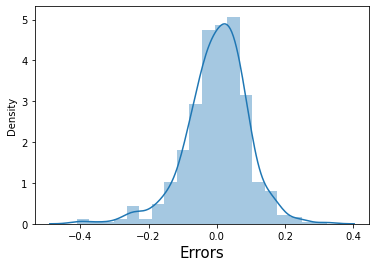

In [402]:
y_train_pred=lm_9.predict(X_train_lm_9)

#lets Check Normality for the error terms
import warnings #import warnings lib
warnings.filterwarnings("ignore")

sns.distplot((y_train-y_train_pred),bins=20)
plt.xlabel("Errors",fontsize=15)
plt.show()

#### From the distplot we can see errors normally centered at 0 which is significant 

In [403]:
#Displaying the VIF
calcVIF(X_train_new)

,Features,VIF
2,temp,3.71
3,windspeed,3.16
0,yr,1.87
4,Summer,1.61
8,Mist,1.45
5,Winter,1.36
6,Sep,1.17
7,Light Snow,1.08
1,holiday,1.04


### PREDICTIONS USING FINAL MODEL 

In [404]:
data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter,Feb,Mar,April,May,June,July,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thurs,Fri,Sat,Mist,Light Snow
333,0,0,1,13.325000,15.56105,61.3333,18.167586,3613,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
203,0,0,1,34.815847,40.21435,50.0000,8.791807,3285,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
279,0,0,0,20.944153,25.22020,68.4167,1.500244,4985,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
483,1,0,1,18.791653,22.50605,58.7083,7.832836,6304,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
267,0,0,1,26.000847,28.63185,84.5000,3.375406,5010,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [405]:
### LETS APPLY SCALING ON TEST DATA
num_var=['temp','atemp','hum','windspeed','cnt']
data_test[num_var]=scaler.transform(data_test[num_var])
data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter,Feb,Mar,April,May,June,July,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thurs,Fri,Sat,Mist,Light Snow
333,0,0,1,0.341207,0.324343,0.632030,0.488582,0.413139,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
203,0,0,1,1.013904,1.013214,0.515242,0.185727,0.375403,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
279,0,0,0,0.579699,0.594242,0.705024,-0.049804,0.570985,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
483,1,0,1,0.512322,0.518402,0.604980,0.154750,0.722734,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
267,0,0,1,0.737981,0.689572,0.870760,0.010767,0.573861,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [406]:
data_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter,Feb,Mar,April,May,June,July,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thurs,Fri,Sat,Mist,Light Snow
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.540909,0.040909,0.672727,0.577486,0.569385,0.652310,0.305077,0.529134,0.245455,0.277273,0.227273,0.077273,0.063636,0.100000,0.050000,0.081818,0.100000,0.077273,0.122727,0.081818,0.068182,0.068182,0.163636,0.131818,0.122727,0.136364,0.154545,0.127273,0.327273,0.022727
std,0.499460,0.198531,0.470288,0.244429,0.237294,0.141169,0.168920,0.221141,0.431338,0.448673,0.420026,0.267633,0.244661,0.300684,0.218442,0.274713,0.300684,0.267633,0.328872,0.274713,0.252632,0.252632,0.370789,0.339064,0.328872,0.343957,0.362295,0.334038,0.470288,0.149373
min,0.000000,0.000000,0.000000,0.049103,0.031559,0.311386,-0.049804,0.089623,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.371060,0.385512,0.551846,0.185059,0.381040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.588790,0.599537,0.641738,0.283969,0.525311,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.780492,0.761869,0.752576,0.406005,0.705476,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.029946,1.064361,1.002146,0.800818,0.981707,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [407]:
# Assign the target variable to y and test data to X
y_test=data_test.pop('cnt')
X_test=data_test

In [408]:
y_test.shape

(220,)

In [409]:
X_test.shape

(220, 29)

In [410]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 333 to 707
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          220 non-null    int64  
 1   holiday     220 non-null    int64  
 2   workingday  220 non-null    int64  
 3   temp        220 non-null    float64
 4   atemp       220 non-null    float64
 5   hum         220 non-null    float64
 6   windspeed   220 non-null    float64
 7   Summer      220 non-null    uint8  
 8   Fall        220 non-null    uint8  
 9   Winter      220 non-null    uint8  
 10  Feb         220 non-null    uint8  
 11  Mar         220 non-null    uint8  
 12  April       220 non-null    uint8  
 13  May         220 non-null    uint8  
 14  June        220 non-null    uint8  
 15  July        220 non-null    uint8  
 16  Aug         220 non-null    uint8  
 17  Sep         220 non-null    uint8  
 18  Oct         220 non-null    uint8  
 19  Nov         220 non-null   

In [411]:
# Lets select the variables which are used in our final model

cols=X_train_new.columns
X_test=X_test[cols]

In [412]:
X_test.head()

,yr,holiday,temp,windspeed,Summer,Winter,Sep,Light Snow,Mist
333,0,0,0.341207,0.488582,0,1,0,0,0
203,0,0,1.013904,0.185727,0,0,0,0,0
279,0,0,0.579699,-0.049804,0,1,0,0,0
483,1,0,0.512322,0.154750,1,0,0,0,0
267,0,0,0.737981,0.010767,0,1,1,0,1


In [413]:
## adding constant
X_test_lm=sm.add_constant(X_test)

In [414]:
## making y test predictions
y_test_pred=lm_9.predict(X_test_lm)

In [415]:
## r2 score
r2=r2_score(y_test,y_test_pred)
r2

0.7858170400398163

In [416]:
#Lets Calculating adjusted r2 score

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7766


### MODEL EVALUATION 

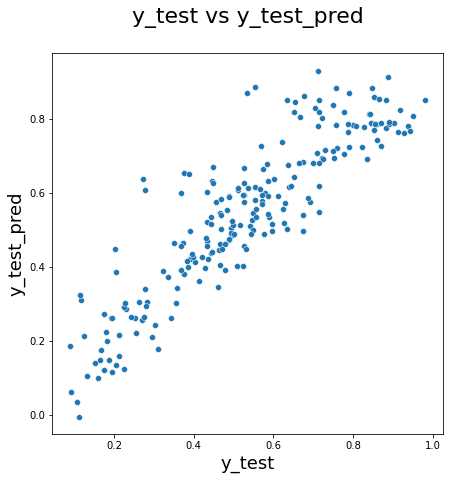

In [417]:
#To understand the linearity lets plot y_test and y_test_pred 
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test,y=y_test_pred)
plt.title("y_test vs y_test_pred\n",fontsize=22)
plt.xlabel("y_test",fontsize=18)
plt.ylabel("y_test_pred",fontsize=18)
plt.show()

 Yes, y_test & y_test_pred follow linear relation from the plot 

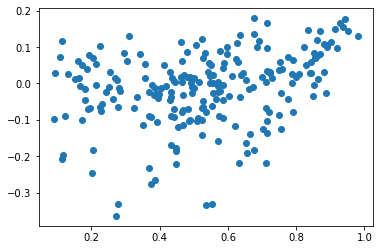

In [418]:
## Lets check the residual terms
resid=y_test-y_test_pred
plt.scatter(y_test,resid)
plt.show()

We can see from the plot above that residuals are randomly distributed & not following any patterns 

In [419]:
##Lets check the parameters of final model
lm_9.params

const         0.108067
yr            0.234515
holiday      -0.071614
temp          0.564971
windspeed    -0.150211
Summer        0.084870
Winter        0.134806
Sep           0.082420
Light Snow   -0.263087
Mist         -0.076336
dtype: float64

#### The final model which is significant can be given by the below equation :
####   cnt = 0.108067 + (yr 0.234515) - (holiday * 0.071614) + (temp * 0.564971) - (windspeed * 0.150211) + (summer * 0.084870) + (winter * 0.134806)
####        + (sep * 0.082420) - (light snow * 0.263087) - (mist * 0.076336)* 

### Observations from the model

#### 1. Year  0.234515 coefficent indicates that a unit increase in year, increases bike shares by 0.2345 units.
#### 2. Holiday :  0.071614 coefficent indicates that a unit increase in holiday, decreases  bike shares by 0.0716 units.
#### 3. Temp : 0.564971 coefficent indicates that a unit increase in Temp, increases bike shares by 0.5649 units.
#### 4. Windspeed : 0.150211 coefficent indicates that a unit increase in windspeed, decreases the bike shares by 0.1502 units.
#### 5. Summer : 0.084870 coefficent indicates that a unit increase in Summer, increases the bike shares by 0.0848 units.
#### 6. Winter :  0.134806 coefficent indicates that a unit increase in winter, increases the bike shares by 0.1348 units.
#### 7. Sept :  0.082420 coefficent indicates that a unit increase in september, increases the bike shares by 0.0824 units.
#### 8. Light Snow: 0.263087 coefficent indicates that a unit increase in Light Snow, decreases the bike shares by 0.2630 units.
#### 9. Mist : 0.076336 coefficent indicates that a unit increase in mist, decreases the bike shares by 0.0763 units.

### Regression plot

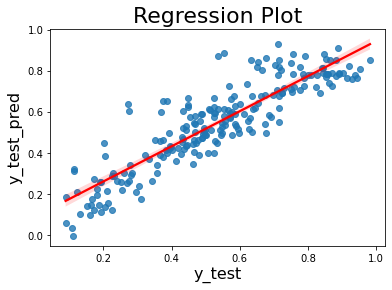

In [420]:
# Plot a regression plot on predictive data 
sns.regplot(x=y_test,y=y_test_pred, line_kws={'color':'Red'})
plt.title("Regression Plot",fontsize=22)
plt.xlabel("y_test",fontsize=16)
plt.ylabel("y_test_pred",fontsize=16)
plt.show()

#### Observation from the Regression plot are:
####    Comparing between train and test Data
#### -Train data r2 : 0.833
#### -Train data adj r2 : 0.830
#### -Test data r2 : 0.785
#### -Test data adj r2 : 0.776

## Main predictions:

####    Temperature: 0.5649 coefficent which indicates a unit increase in temperature increses the bike shares by 0.5649 units.
####     Weather Sit.( Light Snow): -0.2630 coefficent which indicates a unit increase in weather situation decreases the bike shares                by 0.2630 units.
####     Year: 0.2345 coefficent which indicates that a unit increase in year variable increases the bike shares by 0.2345 units.